# Capstone Project - Predicting User Sentiments- Solution (Upload)

### Business Problem
##### (A description of the problem and a discussion of the background)

You are hired as a data scientist by a restaurant chain (probably the most prestigious) to tune the business based on customer review.  It is found that recently there is a decline of 5% in the revienue in the last quarter. The restaurant management want to analyze the current situation and see what the individual customer feel about the restaurant. 

The Restaurant management decided to give a bonus point for their customer if they give a review (good or bad) in foursquare website in their venue in the chain of business. 

As there are many outlets and many thousands of users for the restaurants looking at each comment and review is not possible. So, as a data scientist, you are asked to prepare a model to predict if the user is happy or unhappy based on the comments without reading each and every line in it. 

The management also want to see what are the main keyword in the review (positive and negative) based on which the management can take actions.



### Summary of Our Solution 
##### (A description of the data and how it will be used to solve the problem)

### Overview of the solution

A robust prediction model need to be prepared based on the available reviews and scroes that is available. The avaialable soruce for sentiments and its rating need to be reliable. Once we recive the data(in our case we got a <b>keggle dataset</b>), the data need to be analyzed and make sure that we have enough data to try with.
    
Once we get the data, we do cleaning, remove stop words and vectorize it so that we can apply different machine learning algorithms. In our case, we use a classification algorithm to classify the comments from 1 - 3. 

Based on the words, we can find different words which can be identified as bad reviws and make some special care about those cases. 

Once we prepare the model, we could use the model to find the specific venue in the foursqure and find the recent user comments. Also check if the user comments are positive or negative. If they are negative, take special care and make necessary actions to rectify those bad reviews based on the keywords used in the review. 
 
We use sentiment analysis in scilearn to make a predictive model in order to see if the user review is positive, negative, or nutral.

We will use the available sentiments from different restaurants to train the model. Based on the trained model, we will test the prediction based on sample test data. once the testing is found successful, we will use the new reviews from the user and give a score based on the trained model

<hr>

## 1. Data Preparation Stage

#### 1.1 importing data

First import necessary packages such as pandas, geocoer and HTTP Requests

In [33]:
import pandas as pd
import geocoder # import geocoder
import requests # library to handle requests
from nltk import *

#### 1.2 Now we need to find the dataset for training the sentiments analysis

Initially we thought of getting the data from Foursquare, but it is found that the data for tips is premium category, so it has a limit to get the number of reviews.  

We have searched for different datasets for Indian context and found the data found a good one at https://www.kaggle.com/ranjitha1/hotel-reviews-city-chennai/version/2. This dataset is good for experimentation purpuse.

We use this dataset and downloaded to 'chennai_reviews.csv' and we read data to dataframe


In [34]:
def len_x(x):
    x = '' + str(x)
    return len(x)
    
df_all = pd.read_csv('chennai_reviews.csv')
df_all = df_all[['Hotel_name', 'Review_Title','Review_Text' ,'Sentiment','Rating_Percentage' ]]
df_all['txt_length'] = df_all['Review_Text'].apply(len_x)
df = df_all[df_all['Hotel_name'] == 'Accord Metropolitan']
df.head(3)

,Hotel_name,Review_Title,Review_Text,Sentiment,Rating_Percentage,txt_length
0,Accord Metropolitan,Excellent comfortableness during stay,Its really nice place to stay especially for b...,3,100,74
1,Accord Metropolitan,Not too comfortable,It seems that hotel does not check the basic a...,1,20,385
2,Accord Metropolitan,NaN,Worst hotel I have ever encountered. I will ne...,1,20,92


#### 1.1 EDA

Let's explore the data. Put some visualizaiton to see the insights of the data

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

Use FacetGrid from the seaborn library to create histograms of text length based off of the  ratings.

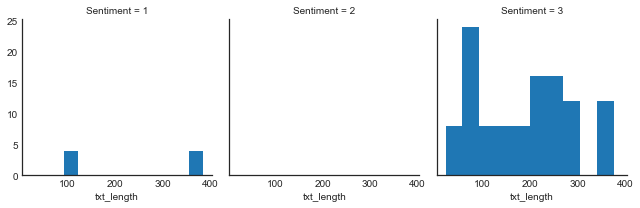

In [36]:
g = sns.FacetGrid(df,col='Sentiment')
g.map(plt.hist,'txt_length')

Creating a boxplot of text length for rating

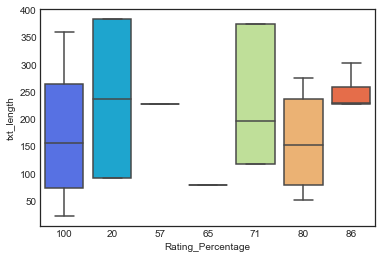

In [37]:
sns.boxplot(x='Rating_Percentage',y='txt_length',data=df,palette='rainbow')

Now check the size of the text and analyse the mean, std and other statistical aspects of the text data

In [38]:
df.describe()

,txt_length
count,124.000000
mean,193.258065
std,102.558480
min,22.000000
25%,80.000000
50%,214.000000
75%,266.000000
max,385.000000


Creating a countplot of the number of occurrences for each type of star rating.

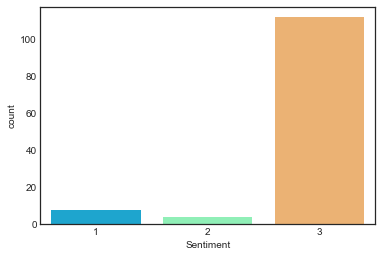

In [39]:
sns.countplot(x='Sentiment',data=df,palette='rainbow')

## 2. Sentiments  Analysis - Classification 

#### 2.1 First we need to do the clean-up 
Clean up activities include processing stop words, removing repeating words and further cleanup of punctuations and meaningless words

In [ ]:
# Importing and downloading the stop words
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

#### 2.2 Check the stop words processing
Make sure that the stop words are working and prepare the methods for processing the stop words and punctuations. We'll also remove very common words, ('the', 'a', etc..).

In [41]:
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

#### 2.3 Text Pre-processing

The classification algorithms need numerical feature vector in order to perform the classification task.

In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).

Let's create a function that will process the string in the message column, then we can just use apply() in pandas and then remove punctuation. 


In [45]:

import string
def clean_up_text(mess):
    """
    1. Remove punctuation
    2. Remove stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]



329


Bag-of-Words (bw_trans) takes care of the words processing. It transforms the entire dataframe with a reduced memory space etc. 

#### 2.4 Text  Normalization¶

Continue normalizing text. Such as Stemming or distinguishing by part of speech.

## 3 Vectorization

Now we need to convert messages to vector. We convert each message, represented as a list of tokens 

#### 3.1 Following steps involved: 
* Frequency of word occurances 
* Weight of the counts
* Normalize the vectors to unit length


In [ ]:
bw_trans = CountVectorizer(analyzer=clean_up_text).fit(df['Review_Text'])

# Print total number of vocab words
print(len(bw_trans.vocabulary_))

#### 3.2 Check vectorizaiton from sample data 
Now check the result of the vectorization from our data sample

In [52]:
sample_txt = df['Review_Text'][3]
print(sample_txt)

Had a good time in this hotel and the staff Kumar,aishwarya, and the house keeping guy not sure what his name these people make my stay pleasant and happy for 5 days. For sure I will be back to this place to stay in chennai.Good job guys


In [62]:
bw11 = bw_trans.transform([sample_txt])
print(bw11)
print(bw11.shape)

  (0, 3)	1
  (0, 31)	1
  (0, 76)	1
  (0, 104)	1
  (0, 121)	1
  (0, 158)	1
  (0, 161)	1
  (0, 162)	1
  (0, 164)	1
  (0, 169)	1
  (0, 171)	1
  (0, 180)	1
  (0, 181)	1
  (0, 197)	1
  (0, 206)	1
  (0, 229)	1
  (0, 233)	1
  (0, 234)	1
  (0, 283)	1
  (0, 287)	2
  (0, 290)	2
  (0, 301)	1
(1, 329)


In [56]:
print(bw_trans.get_feature_names()[158])
print(bw_trans.get_feature_names()[209])

good
needs


In [63]:
messages_bw = bw_trans.transform(df['Review_Text'])

In [65]:
print('Shape, Sparse Matrix: ', messages_bw.shape)
print('Amount, Non-Zero occurences: ', messages_bw.nnz)

Shape, Sparse Matrix:  (124, 329)
Amount, Non-Zero occurences:  2104


In [66]:
sparsity = (100.0 * messages_bw.nnz / (messages_bw.shape[0] * messages_bw.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 5


## 4. term frequency-inverse document frequency (TF-IDF)

TF-IDF is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus.

#### 4.1 TFIDF implementation 
Now use the SciKit learn to implement the TF-IDF logic in python

In [69]:
#SciKit Learn: TFIDF implementation 
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_trans = TfidfTransformer().fit(messages_bw)
tfidf11 = tfidf_trans.transform(bw11)
print(tfidf11)

  (0, 301)	0.17632072409454216
  (0, 290)	0.4558946864168551
  (0, 287)	0.19291671702975685
  (0, 283)	0.10923052725386026
  (0, 234)	0.15040922205989907
  (0, 233)	0.15040922205989907
  (0, 229)	0.22794734320842755
  (0, 206)	0.22794734320842755
  (0, 197)	0.19618902317255257
  (0, 181)	0.19618902317255257
  (0, 180)	0.22794734320842755
  (0, 171)	0.19618902317255257
  (0, 169)	0.07747220721798531
  (0, 164)	0.22794734320842755
  (0, 162)	0.22794734320842755
  (0, 161)	0.22794734320842755
  (0, 158)	0.08936222817584988
  (0, 121)	0.17632072409454216
  (0, 104)	0.22794734320842755
  (0, 76)	0.22794734320842755
  (0, 31)	0.22794734320842755
  (0, 3)	0.19618902317255257


#### 4.2 TFIDF implementation 
Check the vocabulary and see the importance of words

In [71]:
bw_trans.vocabulary_

{'really': 251,
 'nice': 212,
 'place': 233,
 'stay': 287,
 'especially': 135,
 'business': 88,
 'tourist': 307,
 'purpose': 247,
 'seems': 268,
 'hotel': 169,
 'check': 100,
 'basic': 78,
 'amenities': 72,
 'room': 264,
 'handing': 163,
 'traveller': 310,
 'phone': 231,
 'working': 325,
 'created': 117,
 'problem': 242,
 'hectic': 166,
 'day': 120,
 'travel': 309,
 'would': 327,
 'like': 186,
 'relax': 255,
 'work': 324,
 'pace': 226,
 'sent': 269,
 'technician': 294,
 'kept': 182,
 'looking': 191,
 'fix': 149,
 'hour': 170,
 'get': 157,
 'changed': 98,
 'Worst': 64,
 'ever': 137,
 'encountered': 133,
 'never': 211,
 'think': 299,
 'thiis': 296,
 'future': 156,
 'good': 158,
 'time': 301,
 'staff': 283,
 'Kumaraishwarya': 31,
 'house': 171,
 'keeping': 181,
 'guy': 161,
 'sure': 290,
 'name': 206,
 'people': 229,
 'make': 197,
 'pleasant': 234,
 'happy': 164,
 '5': 3,
 'days': 121,
 'back': 76,
 'chennaiGood': 104,
 'job': 180,
 'guys': 162,
 'Veg': 60,
 'food': 150,
 'non': 213,
 've

#### 4.3 TFIDF Check Scores 
Check the important of some random words words

In [72]:
print(tfidf_trans.idf_[bw_trans.vocabulary_['polite']])
print(tfidf_trans.idf_[bw_trans.vocabulary_['offer']])

4.218875824868201
3.2633643798407643


#### 4.4 TFIDF Transform
Transform bag-of-words corpus into TF-IDF

In [80]:
messages_tfidf = tfidf_trans.transform(messages_bw)
print(messages_tfidf.shape)

(124, 329)


## 5 Training Model for Navie Bayes
#### 5.1 Selecting the classification scheme and training
We'll be using scikit-learn Naive Bayes classifier  in our scenario. The data is fit into the MultinomialNB class object

In [81]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB().fit(messages_tfidf, df['Sentiment'])

#### 5.2 Try some prediction using sample data

quick check for prediction using some sample and found a good match

In [82]:
print('predicted:', nb_model.predict(tfidf11)[0])
print('expected:', df.Sentiment[3])

predicted: 3
expected: 3


#### 5.3 Check the predicted values
Now have a quick check on the predicted values

In [85]:
all_predictions = nb_model.predict(messages_tfidf)
print(all_predictions)

['3' '1' '1' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '2' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '1' '1' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '2' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '1' '1' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '2' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '1' '1' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '2' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3']



## 6: Text Analytics Model Evaluation

#### 6.1 Check the accuracy using the confusion matrix
Get the confusion matrix. As there are three values in the set, it is found all the values are correctly predicted without any false positives

In [86]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(df['Sentiment'],all_predictions))

[[  8   0   0]
 [  0   4   0]
 [  0   0 112]]


In [87]:
from sklearn.metrics import classification_report
print (classification_report(df['Sentiment'], all_predictions))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00         8
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00       112

avg / total       1.00      1.00      1.00       124



## 7. Train Test Split 
Train Test Split of original data for actual training of model

#### 7.1  Split Data
The test size is 20% of the  dataset and the training is the remining. 

In [90]:
from sklearn.model_selection import train_test_split

txt_train, txt_test, senti_train, senti_test = \
train_test_split(df['Review_Text'], df['Sentiment'], test_size=0.2)

print(len(txt_train), len(txt_test), len(senti_train) + len(senti_test))

99 25 124


#### 7.1  Creating a Data Pipeline

We use SciKit Learn's pipeline capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use.

In [92]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_up_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pass message text data and the pipeline will pre-process it

In [93]:
pipeline.fit(txt_train,senti_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function clean_up_text at 0x0000023CD1FA9BF8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocess...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

Now test our model using the predict mechanism of sklearn 

In [94]:
predictions = pipeline.predict(txt_test)

Show the model performance

In [297]:
print(classification_report(predictions,senti_test))

             precision    recall  f1-score   support

          2       1.00      1.00      1.00         1
          3       1.00      1.00      1.00        24

avg / total       1.00      1.00      1.00        25



In [19]:
import requests # library to handle requests

## 8. Our Sentimental Model is ready 

Now in the following section, we will put the logic to use the model in the actual scenario of the hotel we are intereseted in. 

Now in the following sections, we will use the social networking data and utilize the fourquare APIs to get the sentiments of the users and see if they are in favor of the restaurant or not

## 9. Gather details on the hotel data

#### 9.1  Get the city data
The following code is to get the list of cities to cross check. We are evaluating the cities of "UAE"

Note: <i>As there is a pickle file already created, no need of executing the following again

In [334]:
# 
if False:
    results = requests.get(url).json()
    df = pd.read_csv('https://datahub.io/core/world-cities/r/world-cities.csv')

    df = df[df['country'] == 'United Arab Emirates']
    df.rename(columns={'name': 'City', 'subcountry': 'Province'}, inplace=True)
    df = df[['City','Province' ]]

old code click : <b>here 

<!--  
   This logic is made <i>depreciated</i> and modified to make it generic for multiple countries

    url = "https://en.wikipedia.org/wiki/List_of_cities_in_the_United_Arab_Emirates"
    df = pd.read_html(url)[0] #pd.read_html(url, skiprows=1)[0]
    df.columns = df.iloc[0]
    df = df.iloc[1:]
    df.head()
-->


#### 9.2 Get the city cordniates
The following code is to get the list of cordniates to cross check. We are evaluating the cities of "UAE"

Note: <i>As there is a pickle file already created, no need of executing the following again
    


In [74]:
# 
if False:
    for index, row in df.iterrows():
        # initialize your variable to None
        lat_lng_coords = None

        # loop until you get the coordinates
        while(lat_lng_coords is None):
          g = geocoder.arcgis('{},{}, United Arab Emirates'.format(row['City'], row['Province']))
          lat_lng_coords = g.latlng

        latitude = lat_lng_coords[0]
        longitude = lat_lng_coords[1]
        df.at[index, 'Latitude'] = latitude
        df.at[index, 'Longitude'] = longitude
        print(longitude,latitude, row['City'] )


55.55517000000003 25.564730000000054 Umm al Qaywayn
55.94320000000005 25.78953000000007 Ras al-Khaimah
56.34199000000007 25.331320000000062 Khawr Fakkān
55.30884000000003 25.269510000000025 Dubai
56.27708000000007 25.599260000000072 Dibba Al-Fujairah
56.272740000000056 25.62107000000003 Dibba Al-Hisn
55.392030000000034 25.352850000000046 Sharjah
52.73056000000008 24.110280000000046 Ar Ruways
56.34141000000005 25.11641000000003 Al Fujayrah
55.68635000000006 24.207390000000032 Al Ain
55.44213000000008 25.402310000000057 Ajman
55.88157000000007 25.28812000000005 Adh Dhayd
54.37173000000007 24.46918000000005 Abu Dhabi


#### 9.3 Save City Data
Save the data into picke file for future references

In [337]:
df.to_pickle("./uae_city_details.pkl")

#### 9.4 Visualize the map data 
Visualize the map data using the folium map library. All the interested locations are marked as bubbles in the map 

In [76]:
#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

map_address = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['City']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_address)  
    
map_address

##  10 Foursquire API for live sentiments 
We will get the details of the cities and interested location based on the query that we set. and then based on the interested location, we will gather the sentiments of specific location. 

#### 10.1 Data Scarping to get the required data
We first gather all the interesting venues with the <b>food</b> type. 
* We then save all the interesting places for analysis
* then we select the requred interested venue for focused study

**Now this section is the key and client id details requried for FourSqare API**

In [100]:
# Now this section is the key and client id details requried for FourSqare API
CLIENT_ID = 'xxxx' # your Foursquare ID
CLIENT_SECRET = 'xxxx' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4CTAG1JEDGEOAVDVG4KSAXTXXTHSVHQ35QK2NQHSF4FXSAYK
CLIENT_SECRET:V5ZEKZ52E2SH3CMKW3J5FW0PIJJO1KK1HTURDSR30QUJRM35


#### 10.2 Check the API working 
Test the API with a random venue 

In [103]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

In [ ]:
city_latitude = df.loc[2, 'Latitude'] # neighborhood latitude value
city_longitude = df.loc[2, 'Longitude'] # neighborhood longitude value
#query = 'Hotel'
# type your answer here


#https://foursquare.com/explore?mode=url&near=Khobar%2C%20Saudi%20Arabia&nearGeoId=72057594038037259&q=starbucks

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&cat=food&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    city_latitude, 
    city_longitude, 
    radius, 
    LIMIT)


#### 10.3 Check the URL
Check the url and the syndax of the URL

In [135]:
url

'https://api.foursquare.com/v2/venues/explore?&client_id=4CTAG1JEDGEOAVDVG4KSAXTXXTHSVHQ35QK2NQHSF4FXSAYK&cat=food&client_secret=V5ZEKZ52E2SH3CMKW3J5FW0PIJJO1KK1HTURDSR30QUJRM35&v=20180605&ll=25.564730000000054,55.55517000000003&radius=500&limit=100'

In [136]:
results = requests.get(url).json()

#### 10.4 Check the JSON Output 
Check the output once the result is received. 

In [138]:
results

{'meta': {'code': 200, 'requestId': '5be2080e9fb6b71c74d3de8e'},
 'response': {'headerLocation': 'Umm al-Quwain',
  'headerFullLocation': 'Umm al-Quwain',
  'headerLocationGranularity': 'city',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 25.56923000450006,
    'lng': 55.56014906080558},
   'sw': {'lat': 25.56022999550005, 'lng': 55.550190939194486}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d3057caa62d721ec754997d',
       'name': 'Lulu Center',
       'location': {'address': 'King Faisal Rd',
        'lat': 25.565576077656612,
        'lng': 55.552780776667426,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.565576077656612,
          'lng': 55.552780776667426}],
        'distance': 257,
        'cc': 'AE',
        'city': 'أم ال

#### 10.5 Collect information for all the interested venues 
The information about the venues are gathered for further analysis

We make a method and then use the method to be passed into the API call repeatedly

In [139]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [140]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
if False:
    venues = results['response']['groups'][0]['items']

    nearby_venues = json_normalize(venues) # flatten JSON

    # filter columns
    filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    nearby_venues =nearby_venues.loc[:, filtered_columns]

    # filter the category for each row
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

    # clean columns
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

    nearby_venues.shape

(4, 5)

Method to gather the venues iteratively

In [141]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&cat=food&client_secret={}&v={}&ll={},{}&radius={}&limit={}&q={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            city_latitude, 
            city_longitude, 
            radius, 
            LIMIT, 
            query)
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']             
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['id'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
        except ValueError:
            print('error',ValueError )
            
        # make the GET request
        
        
            


    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'id', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### 10.6 Save Result for further use

Now call the method and save the result in a picke file for further use. This is saved now for performance reasons. Otherwise each time it will make a call to the server of foursquire, which is an overhead to the system. When you use production system, better to call directly from system instead of picke file

In [142]:
# type your answer here
if False:
    uae_venues = getNearbyVenues(names=df['City'],
                                       latitudes=df['Latitude'],
                                       longitudes=df['Longitude']
                                      )
    uae_venues.to_pickle("./uae_city_venues.pkl")


Umm al Qaywayn
Ras al-Khaimah
Khawr Fakkān
Dubai
Dibba Al-Fujairah
Dibba Al-Hisn
Sharjah
Ar Ruways
Al Fujayrah
Al Ain
Ajman
Adh Dhayd
Abu Dhabi


#### 10.7 Examine all the locations 
Examine all the location and see the venue id, which is important to make the **premium call** to the foursquare.

Optionally read the data from the picke file, if you are working off-line

In [96]:
uae_venues = pd.read_pickle("./uae_city_venues.pkl")

In [97]:
uae_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,id,Venue Latitude,Venue Longitude,Venue Category
0,Umm al Qaywayn,25.56473,55.55517,Lulu Center,4d3057caa62d721ec754997d,25.565576,55.552781,Shopping Mall
1,Umm al Qaywayn,25.56473,55.55517,Afandim Restaurant,5748496b498e451d7575e43e,25.562439,55.554600,Steakhouse
2,Umm al Qaywayn,25.56473,55.55517,China Mall Umm Al Quwain,5b40daa467f62b002cceed2c,25.561664,55.553554,Shopping Mall
3,Umm al Qaywayn,25.56473,55.55517,Cafe Sham,53667749498e51c1bfe0913d,25.563407,55.551682,Coffee Shop
4,Ras al-Khaimah,25.78953,55.94320,Lulu Center,4d3057caa62d721ec754997d,25.565576,55.552781,Shopping Mall
5,Ras al-Khaimah,25.78953,55.94320,Afandim Restaurant,5748496b498e451d7575e43e,25.562439,55.554600,Steakhouse
6,Ras al-Khaimah,25.78953,55.94320,China Mall Umm Al Quwain,5b40daa467f62b002cceed2c,25.561664,55.553554,Shopping Mall
7,Ras al-Khaimah,25.78953,55.94320,Cafe Sham,53667749498e51c1bfe0913d,25.563407,55.551682,Coffee Shop
8,Khawr Fakkān,25.33132,56.34199,Lulu Center,4d3057caa62d721ec754997d,25.565576,55.552781,Shopping Mall
9,Khawr Fakkān,25.33132,56.34199,Afandim Restaurant,5748496b498e451d7575e43e,25.562439,55.554600,Steakhouse


##  11 Gather Sentiments

Now you gather sentiments for the intereted venues. IN our case we focus on the **Lulu Center** with Venue ID *"4d3057caa62d721ec754997d"* food center and see how the sentiments works for this food center 

#### 11.1 Send the foursquare API to gather sentiments of single Venue 
We can iteratively call the details of the venue and collet the data into a DataFrame from JSON

In [104]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
for i in range(1, 6):
    venue_id = uae_venues.loc[i, 'id'] # neighborhood latitude value
    if venue_id == '4d3057caa62d721ec754997d':
        query = 'Hotel'
        # type your answer here
        LIMIT = 100 # limit of number of venues returned by Foursquare API
        radius = 500 # define radius

        #https://foursquare.com/explore?mode=url&near=Khobar%2C%20Saudi%20Arabia&nearGeoId=72057594038037259&q=starbucks

        url = 'https://api.foursquare.com/v2/venues/{}/tips?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)

        results = requests.get(url).json()

        try:
            print(venue_id)
            print(results['response'])
            print(results['response']['tips']['items'])
            venues = results['response']['tips']['items']

            nearby_venues = json_normalize(venues) # flatten JSON

            print(nearby_venues)  
        except ValueError:
            print('Error', ValueError)

        

4d3057caa62d721ec754997d
{'tips': {'count': 5, 'items': [{'id': '4f98f2bbe4b00e356b6fb1fa', 'createdAt': 1335423675, 'text': 'Try chicken biriyani here. Awesome!', 'type': 'user', 'canonicalUrl': 'https://foursquare.com/item/4f98f2bbe4b00e356b6fb1fa', 'lang': 'en', 'likes': {'count': 2, 'groups': [{'type': 'others', 'count': 2, 'items': [{'id': '37419229', 'firstName': 'George', 'lastName': 'J Lloyd 😎', 'gender': 'male', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/37419229-VHUAQED5HH2NRM3Q'}}, {'id': '30323126', 'firstName': 'Tamer', 'lastName': 'Omary', 'gender': 'male', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/30323126-2WXSOAZIJOK024RO.jpg'}}]}], 'summary': '2 likes'}, 'logView': True, 'agreeCount': 2, 'disagreeCount': 0, 'todo': {'count': 0}, 'user': {'id': '25401528', 'firstName': 'Jacob', 'lastName': 'Verghese', 'gender': 'male', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/blank_boy.png', 'default': True

#### 11.2 Tips  (text) collected in a dataframe 
The nearby_venues hold the text and tips entered by the users as the user reviews. In this example there is only one value. But it can have multiple values

In [106]:
nearby_venues

,agreeCount,canonicalUrl,createdAt,disagreeCount,id,lang,likes.count,likes.groups,likes.summary,logView,text,todo.count,type,user.firstName,user.gender,user.id,user.lastName,user.photo.default,user.photo.prefix,user.photo.suffix
0,2,https://foursquare.com/item/4f98f2bbe4b00e356b...,1335423675,0,4f98f2bbe4b00e356b6fb1fa,en,2,"[{'type': 'others', 'count': 2, 'items': [{'id...",2 likes,True,Try chicken biriyani here. Awesome!,0,user,Jacob,male,25401528,Verghese,True,https://fastly.4sqi.net/img/user/,/blank_boy.png


## 12. Using the Sentiments Predictions

Now this is the time to utilize the sentiments analytics model we created as a classification model based on Nave Bayes. We will now use the trained model based on the good quality dataset we got before. 

Optionally, we can gather more similar comments from Foursquare and update the training database 

#### 12.1 Prepare the trainng set with the same format of the original training dataframe

Get an empty dataset and update the records. For testing purpose and simplicity, we have only one record to check

In [424]:
new_df = df[:1]

Now prepare the dataframe for prediction

In [ ]:
new_df['Hotel_name'] = 'Venue'
new_df['Review_Title'] = nearby_venues["text"].loc[0]
new_df['Review_Text'] = nearby_venues["text"].loc[0]
new_df['Sentiment'] ='3'
new_df['Rating_Percentage'] ='100'
new_df

Now predict the result

In [432]:
txt_from_foursquare = new_df['Review_Text']
new_predictions = pipeline.predict(txt_from_foursquare)


#### 12.2 Predicted to have 3 as the sentiments ranking
Predicted to have 3 as the sentiments ranking same as we assumed from the text

In [433]:

senti_from_foursquare = new_df['Sentiment']

#### 12.3 Check for accuracy for our result
There is only one record and there is no much meaning in checking the classification report. 

In [435]:

print(classification_report(senti_from_foursquare, new_predictions))

             precision    recall  f1-score   support

          3       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00         1



#### 12.4 Compare the results
Now check the result to the old result. It is found:

* We have a F1-Score of 94%(.95), 

In [107]:
print(classification_report(predictions,senti_test))

             precision    recall  f1-score   support

          1       0.33      1.00      0.50         1
          2       1.00      1.00      1.00         1
          3       1.00      0.91      0.95        23

avg / total       0.97      0.92      0.94        25



## 13 Final Remakrs
The score says the quality of the model is good enough for this scenario. Further improvements to the model can be done based on more refied data and trying different algorithms with different hyperparameter 

Thanks for reading ... **have a great day**! 